# Test for Calculating Room Acoustic Parameter
- using module 'pyRoomAcoustic'


In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time
import platform

# Import Audio
import wave
import pyaudio
import librosa as rosa
import soundfile

import numpy as np
from scipy.io import wavfile
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg



In [2]:
#
str_os_system = platform.system()
print(str_os_system)
print(os.name)
print(sys.platform)

# Path of audiofiles folder
impulse_dir = os.path.join(os.getcwd(), 'impulsefiles')

# Define wave file name text to open
# Path + wave file name

# IMPULSE WAVE FILE
#wav_fname_impulse = "TyndallBruceMonument.wav"
#wav_fname_impulse = "ElvedenHallMarbleHall.wav'"
#wav_fname_impulse = "EmptyApartmentBedroom.wav"
#wav_fname_impulse = "FalklandPalaceRoyalTennisCourt.wav"
#wav_fname_impulse = "InsidePiano.wav"
#wav_fname_impulse = "MaesHowe.wav"
#wav_fname_impulse = "SportsCentreUniversityOfYork.wav"
#wav_fname_impulse = "StairwayUniversityOfYork.wav"
#wav_fname_impulse = "StAndrewsChurch.wav"
wav_fname_impulse = "mh3_000_ortf_48k.wav"

# TEST AUDIO WAVE FILE
wav_fname_audio = "adult_female_speech.wav"
#wav_fname_audio = "bagpipe_music.wav"
#wav_fname_audio = "bagpipe_steady_chord.wav"
#wav_fname_audio = "flute_arpeggio.wav"
#wav_fname_audio = "flute_music.wav"
#wav_fname_audio = "tuba_arpeggio.wav"
#wav_fname_audio = "tuba_music.wav"

impulse_fname = os.path.join(impulse_dir, wav_fname_impulse)

#print(impulse_fname)

Darwin
posix
darwin
/Users/iMacDev/Documents/workspace_py/pyOssAudioAnalyzer/impulsefiles/mh3_000_ortf_48k.wav


frames = 48000
Audio Format = 1
Number of Channel = 2
Sampling Frequency = 48000
Byte Rate = 288000
Block Align = 6
Bits per Sample = 24
Time = 1.0 sec
Length =  48000


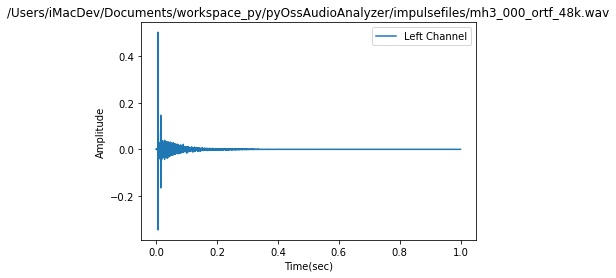

In [3]:
# Read .wav file using pyOssWavfile.read() & Extract .wav file header information

impulse_fmt_chunk = pyOssWavfile.read_format(impulse_fname)
impulse_struct_fmt = pyOssWavfile.extractWavFmtChunk(impulse_fmt_chunk)

if impulse_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    impulse_data, impulse_struct_fmt.fs = soundfile.read(impulse_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    impulse_fmt_chunk, impulse_data, impulse_length = pyOssWavfile.read(impulse_fname)

impulse_time = impulse_data.shape[0] / impulse_struct_fmt.fs

print("Audio Format =", impulse_struct_fmt.format)
print("Number of Channel =", impulse_struct_fmt.ch)
print("Sampling Frequency =", impulse_struct_fmt.fs)
print("Byte Rate =", impulse_struct_fmt.byterate)       # 일종의 Checksum 
print("Block Align =", impulse_struct_fmt.blockalign)
print("Bits per Sample =", impulse_struct_fmt.bitdepth)
print("Time =", impulse_time, "sec")
print("Length = ", impulse_data.shape[0])

# Plot loaded wave file
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data[:,0], impulse_fname, "Left Channel", "Time(sec)", "Amplitude")
#dbg.dPlotAudio(ossWav_fs, np.int16(ossWav_data[:,0] * 32767), audio_fname, "Left Channel", "Time(sec)", "Amplitude")



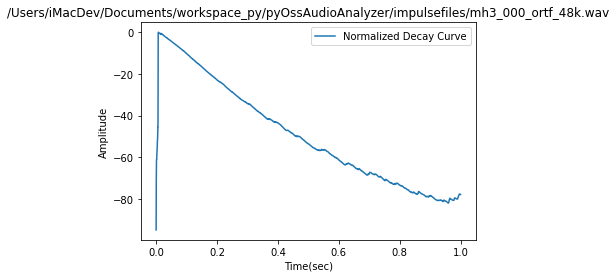

impulse_T60= [[0.595]] impulse_T60 nonLin= [[8.3]]
impulse_EDT= [[0.546]] impulse_EDT nonLin= [[1.9]]
impulse_T10= [[0.091]] impulse_T10 nonLin=EDT= [[1.9]]
impulse_T20= [[0.483]] , impulse_T20 nonLin= [[0.4]]
impulse_T30= [[0.496]] , impulse_T30 nonLin= [[0.8]]


In [4]:
# Calculate T60
import pyRoomAcoustic as room

impulse_decaycurve = room.decayCurve(impulse_data[:,0], impulse_time, impulse_struct_fmt.fs)

# Plot Normalized Decay Curve
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_decaycurve, impulse_fname, "Normalized Decay Curve", "Time(sec)", "Amplitude")

# Calculate T60
impulse_t60, impulse_t60nonLin = room.T60(impulse_decaycurve, impulse_struct_fmt.fs) 
print("impulse_T60=", impulse_t60, "impulse_T60 nonLin=", impulse_t60nonLin)            # for Debug

# Calculate EDT
impulse_EDT, impulse_EDTnonLin = room.EDT(impulse_decaycurve, impulse_struct_fmt.fs)
print("impulse_EDT=", impulse_EDT, "impulse_EDT nonLin=", impulse_EDTnonLin)            # for Debug
print("impulse_T10=", impulse_EDT/6, "impulse_T10 nonLin=EDT=", impulse_EDTnonLin)      # for Debug

# Calculate T20
impulse_t20, impulse_t20nonLin = room.T20(impulse_decaycurve, impulse_struct_fmt.fs)
print("impulse_T20=", impulse_t20, ", impulse_T20 nonLin=", impulse_t20nonLin)          # for Debug

# Calculate T30
impulse_t30, impulse_t30nonLin = room.T30(impulse_decaycurve, impulse_struct_fmt.fs)
print("impulse_T30=", impulse_t30, ", impulse_T30 nonLin=", impulse_t30nonLin)          # for Debug


In [5]:
# Calculate C50, C80, D80

# C50
# ossWav_C50 = room.C50(ossWav_data[:,0], ossWav_fs)
# print("ossWav_C50=", ossWav_C50)         # for Debug
impulse_C50_float32 = room.C50(impulse_data[:,0], impulse_struct_fmt.fs)
print("impulse_C50_float=", impulse_C50_float32)         # for Debug
impulse_C50_int16 = room.C50(np.int16(impulse_data[:,0] * 32767), impulse_struct_fmt.fs)
print("impulse_C50_int=", impulse_C50_int16)         # for Debug

# C80
impulse_C80 = room.C80(impulse_data[:,0], impulse_struct_fmt.fs)
print("impulse_C80=", impulse_C80)         # for Debug

# D50 
impulse_D50 = room.D50(impulse_data[:,0], impulse_struct_fmt.fs)
print("impulse_D50=", impulse_D50)         # for Debug



impulse_C50_float= 9.542251550242588
impulse_C50_int= -7.794397480178114
impulse_C80= 13.920266205282392
impulse_D50= 0.899996403540946
